# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [3]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [4]:
#your turn
# creating data frame with customer names
df = pd.DataFrame(df_transactions.customer_name)

# merging the offers
dummy_region = pd.get_dummies(data=df_transactions.offer_id)
df=pd.concat([df, dummy_region], axis=1)
df = df.groupby('customer_name').sum()
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

In [5]:
# your turn

### What value of SS represent better clusterings?
Smaller values of SS represent better clusterings as a smaller sum of squares error means data points are concentrated more closely around centroids.

### Constructing plot of SSE for each K

Text(0,0.5,'Sum of square error')

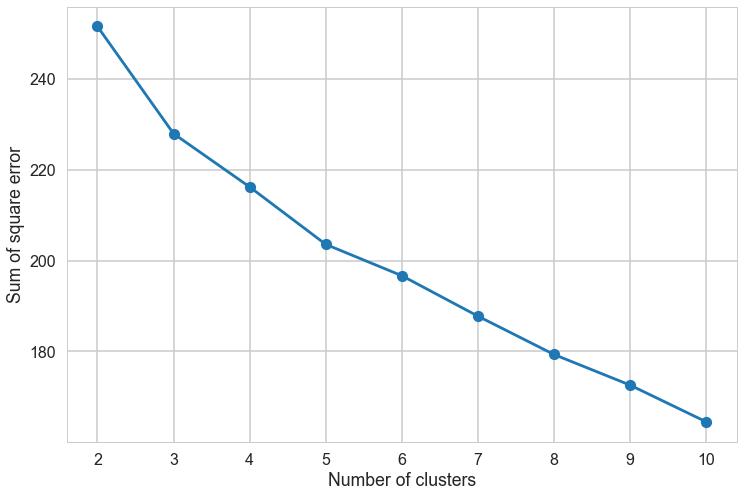

In [6]:
# making the numpy matrix
x_cols = df.values

# importing the KMeans object
from sklearn.cluster import KMeans

# list of number of clusters to iterate over
numbers = list(range(2,11))

# empty list of sum of square error
SS = []

for k in numbers: 
    # instantiating KMeans
    k_model = KMeans(n_clusters = k)
    
    # fitting model
    k_model.fit(x_cols)
    
    ## calculating error
    SS.append(k_model.inertia_)
    
# making a scatter plot
plt.figure(figsize=(12,8))
plt.plot(numbers, SS, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of square error')



We see from the above plot that the best k appears to be 3 using the elbow method

### Making a bar chart showing count of points in each cluster


Text(0.5,0,'Classification')

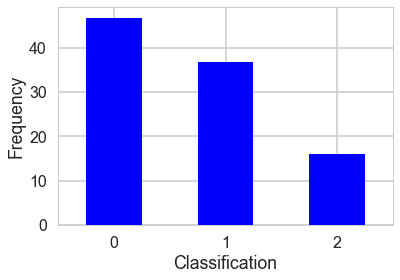

In [7]:
# instantiating KMeans for best k using elbow method
elbow_model = KMeans(n_clusters = 3)
    
# fitting model
elbow_model.fit(x_cols)

# predicting results
predictions = pd.DataFrame({'labels':elbow_model.predict(x_cols)})

# plotting bar chart
ax = predictions['labels'].value_counts().plot.bar(rot = 0, color = 'b')
ax.set_ylabel("Frequency")
ax.set_xlabel("Classification")

### Challenges using elbow method
The elbow (significant decrease in gradient in the SSE vs k plot) might not be easy to identify. 

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

For n_clusters = 2 The average silhouette_score is : 0.0936557328349
For n_clusters = 3 The average silhouette_score is : 0.118899428636
For n_clusters = 4 The average silhouette_score is : 0.123470539196
For n_clusters = 5 The average silhouette_score is : 0.14092516242
For n_clusters = 6 The average silhouette_score is : 0.137179893911
For n_clusters = 7 The average silhouette_score is : 0.116109245662
For n_clusters = 8 The average silhouette_score is : 0.113395738326
For n_clusters = 9 The average silhouette_score is : 0.125059605278
For n_clusters = 10 The average silhouette_score is : 0.119283321348


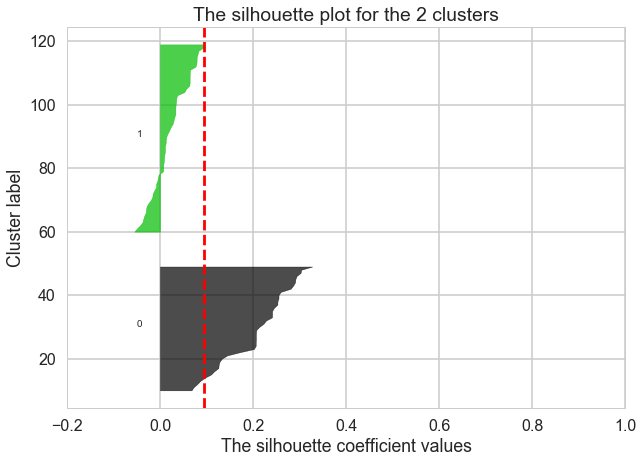

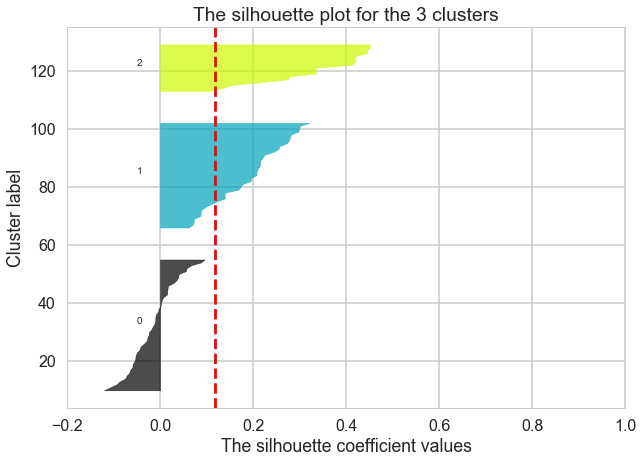

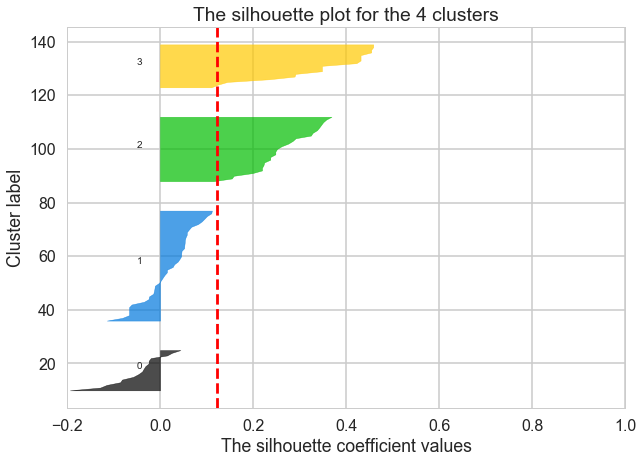

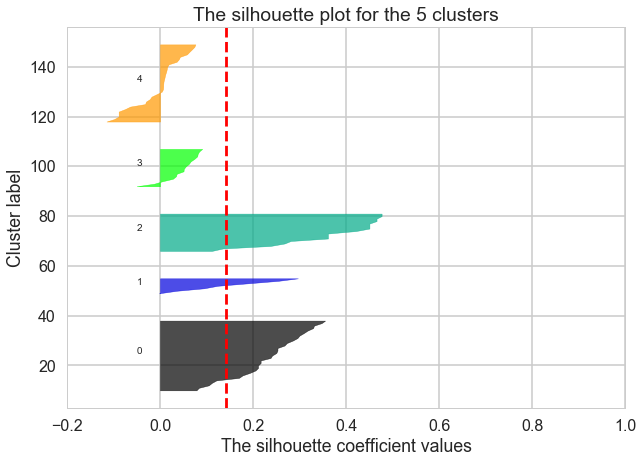

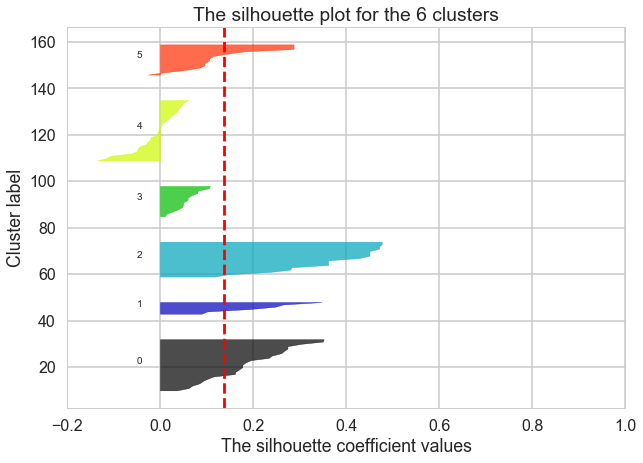

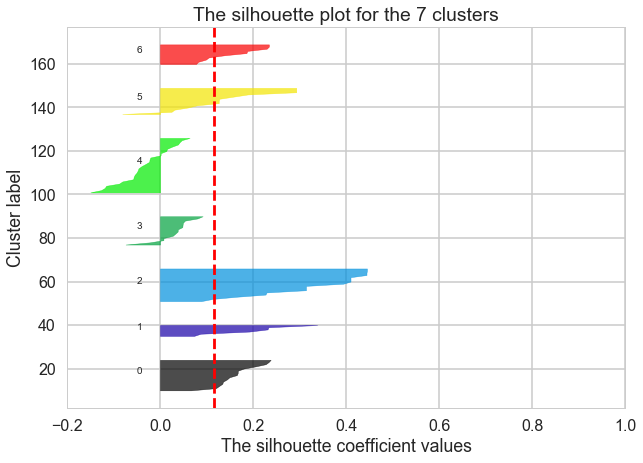

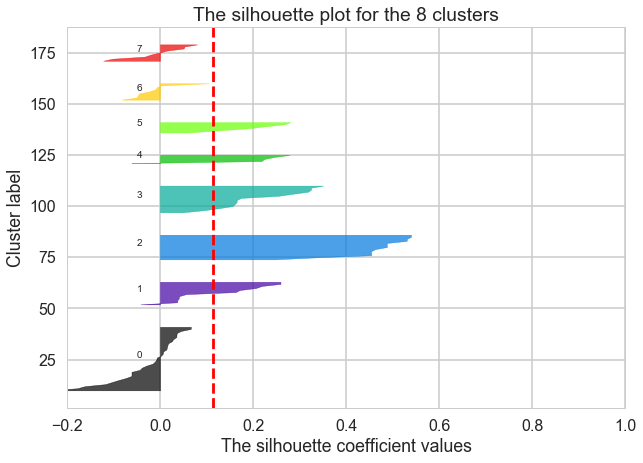

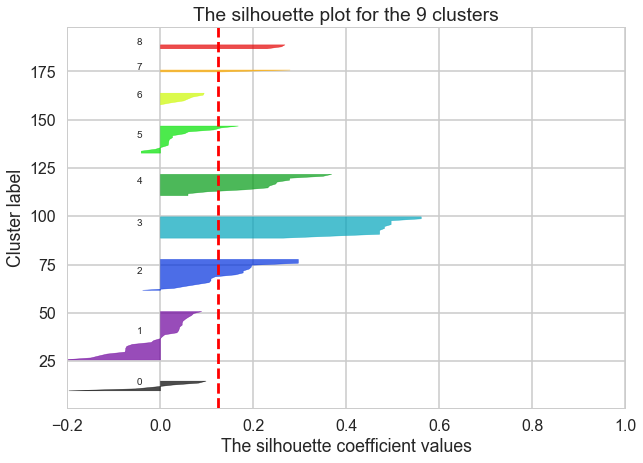

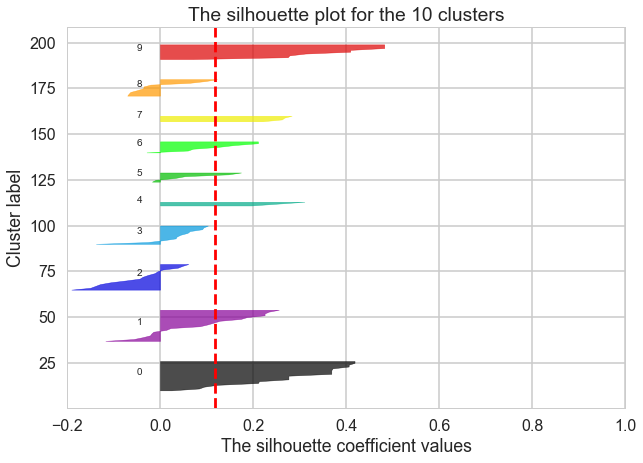

In [8]:
# Your turn.
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

# creating empty list for silhouette average scores
silhouette_avgs = list()

for n_clusters in numbers:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)
    
    # setting x-axis limits
    ax1.set_xlim([-0.2, 1])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_cols)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_cols, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the " + str(i+1) + " clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


### What does the Silhouette score suggest we chose for k?

Text(0,0.5,'Average Silhouette Score')

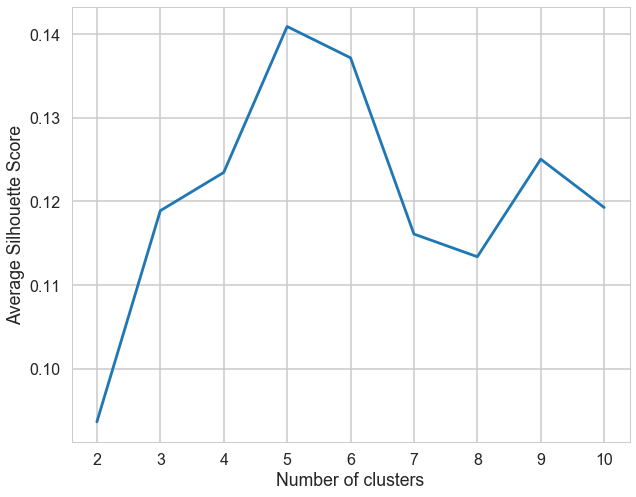

In [9]:
# make line graph of silhoute average scores
plt.figure(figsize=(10,8))
plt.plot(numbers, silhouette_avgs)
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")

The Silhoutte method suggest we chose 5 clusters. This is different from the 3 clusters suggested by the elbow method.

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

Text(0.5,1,'K = 5')

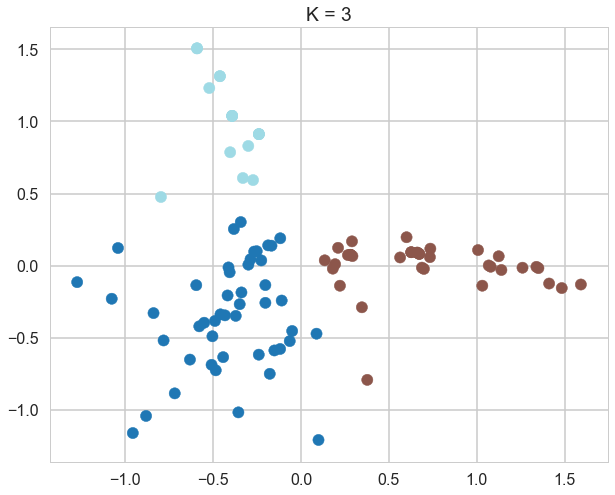

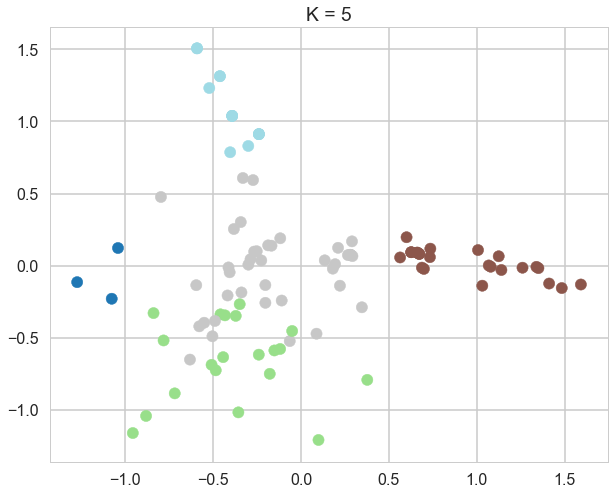

In [10]:
#your turn
# Perform the necessary imports
from sklearn.decomposition import PCA
import matplotlib as mpl

# Create a PCA instance: pca
pca = PCA(n_components=2)

# PCA transform
pca_tform = pca.fit_transform(x_cols)

x = pca_tform[:,0]
y = pca_tform[:,1]

# create dataframe
df_pca = pd.DataFrame({'customer_name':df.index.tolist(), 
                       'cluster_id': predictions['labels'],
                       'x':x, 'y':y})

# creating plot
colormap = plt.get_cmap('tab20')
plt.figure(figsize = (10,8))
plt.scatter(x,y, c = predictions['labels'].tolist(), cmap = colormap)
plt.title('K = 3')

# repeating for 5 clusters
# instantiating KMeans for best k using elbow method
silhouette_model = KMeans(n_clusters = 5)
    
# fitting model
silhouette_model.fit(x_cols)

# predicting results
colormap = plt.get_cmap('tab20')
plt.figure(figsize = (10,8))
plt.scatter(x,y, c = silhouette_model.predict(x_cols), cmap = colormap)
plt.title('K = 5')


As can be seen from the above plots, the best value of K appears to be 3. 

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

In [11]:
# remerging dataframes
df_cluster = pd.merge(df_transactions, df_pca, on = 'customer_name')
df_cluster = pd.merge(df_cluster,df_offers, on = 'offer_id')
df_cluster.head()

,customer_name,offer_id,n,cluster_id,x,y,campaign,varietal,min_qty,discount,origin,past_peak
0,Smith,2,1,2,-0.300227,0.829765,January,Pinot Noir,72,17,France,False
1,Rodriguez,2,1,2,-0.403273,0.786296,January,Pinot Noir,72,17,France,False
2,Martin,2,1,0,-0.382241,0.254034,January,Pinot Noir,72,17,France,False
3,Jackson,2,1,0,-0.839578,-0.328823,January,Pinot Noir,72,17,France,False
4,Campbell,2,1,2,-0.522247,1.231406,January,Pinot Noir,72,17,France,False


In [12]:
# checking variety of wine 
id_0 = df_cluster[df_cluster.cluster_id == 0]
print("Preference of cluster 0:")
print(id_0.varietal.value_counts())
id_1 = df_cluster[df_cluster.cluster_id == 1]
print("")
print("Preference of cluster 1:")
print(id_1.varietal.value_counts())
id_2 = df_cluster[df_cluster.cluster_id == 2]
print("")
print("Preference of cluster 2:")
print(id_2.varietal.value_counts())

Preference of cluster 0:
Champagne             74
Cabernet Sauvignon    30
Prosecco              21
Malbec                13
Chardonnay            13
Merlot                12
Espumante              8
Pinot Noir             7
Pinot Grigio           1
Name: varietal, dtype: int64

Preference of cluster 1:
Espumante             32
Prosecco              20
Malbec                18
Pinot Grigio          16
Merlot                 7
Champagne              6
Cabernet Sauvignon     2
Chardonnay             1
Name: varietal, dtype: int64

Preference of cluster 2:
Pinot Noir    37
Prosecco       2
Malbec         1
Chardonnay     1
Champagne      1
Merlot         1
Name: varietal, dtype: int64


We note that the people in cluster 0 strongly favor Champagne (a sparkling wine), Cabernet Sauvingnon (red wine) and Chardonnay (white wine) when compared with other clusters. The people in cluster 1 favor Espumante (a white wine) and Pinot Grigio (white wine) relative to those in other clusters. The group of people in cluster 2 that prefer Pinot Noir (a red wine) relative to those in other clusters. 

Wine preferences clearly play a strong role in clustering. We can see cluster 0 has a preference for a wider variety of wines, cluster 1 has a preference for certain white wines and cluster 2 has a preference for a particular variety of red wines.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

Text(0,0.5,'Explained Variance')

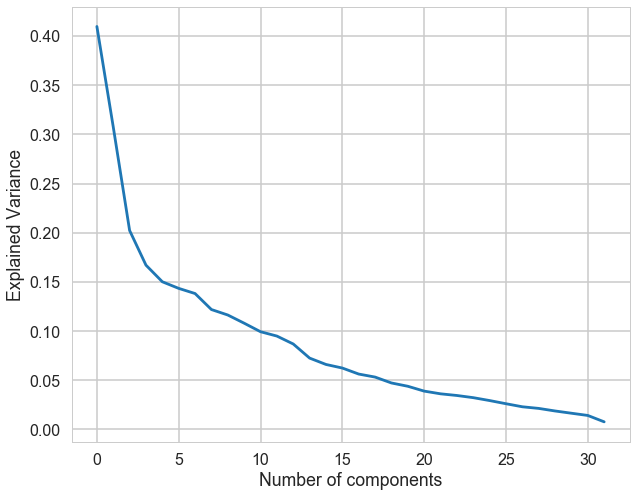

In [13]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)

# Do the rest on your own :)
plt.figure(figsize = (10,8))
features = range(pca.n_components_)
plt.plot(features, pca.explained_variance_)
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')

The curve appears to slow sharply at 4 components. 

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


In [14]:
# Your turn
from mpl_toolkits.mplot3d import Axes3D

# creating a function to test different models 
def model_tester(model):
    model.fit(x_cols)
    
    # calculating number of clusters
    num_clusters = len(np.unique(model.labels_))
    
    # creating a 2D plot
    colormap = plt.get_cmap('tab20')
    plt.figure(figsize = (10,8))
    plt.scatter(x,y, c = model.labels_, cmap = colormap)
    plt.title('K = ' + str(num_clusters))
    
    # checking wine preferences of each cluster
    df_pca = pd.DataFrame({'customer_name':df.index.tolist(), 
                       'cluster_id': model.labels_,
                       'x':x, 'y':y})
    
    # remerging dataframes
    test_cluster = pd.merge(df_transactions, df_pca, on = 'customer_name')
    test_cluster = pd.merge(test_cluster,df_offers, on = 'offer_id')

    # checking variety of wine 
    for cluster in range(num_clusters):
        clus_id = test_cluster[test_cluster.cluster_id == cluster]
        
        # checking for dbscan noise classigication
        if len(clus_id) == 0:
            try:
                clus_id = test_cluster[test_cluster.cluster_id == -1]
                
            except Exception:
                pass
            
        # printing customer wine preferences
        print("Preference of cluster " + str(cluster) + ":")
        print(clus_id.varietal.value_counts())
        print("")
   

### Affinity Propagation

Preference of cluster 0:
Espumante             8
Pinot Grigio          7
Malbec                6
Prosecco              2
Cabernet Sauvignon    1
Merlot                1
Name: varietal, dtype: int64

Preference of cluster 1:
Pinot Noir    30
Malbec         2
Chardonnay     1
Champagne      1
Prosecco       1
Name: varietal, dtype: int64

Preference of cluster 2:
Pinot Grigio    7
Espumante       7
Malbec          7
Prosecco        5
Merlot          2
Name: varietal, dtype: int64

Preference of cluster 3:
Prosecco              14
Champagne              9
Espumante              6
Cabernet Sauvignon     4
Pinot Noir             3
Pinot Grigio           2
Merlot                 2
Malbec                 1
Name: varietal, dtype: int64

Preference of cluster 4:
Champagne             14
Cabernet Sauvignon     6
Prosecco               2
Pinot Noir             2
Malbec                 2
Espumante              2
Name: varietal, dtype: int64

Preference of cluster 5:
Espumante    8
Merlot       3
P

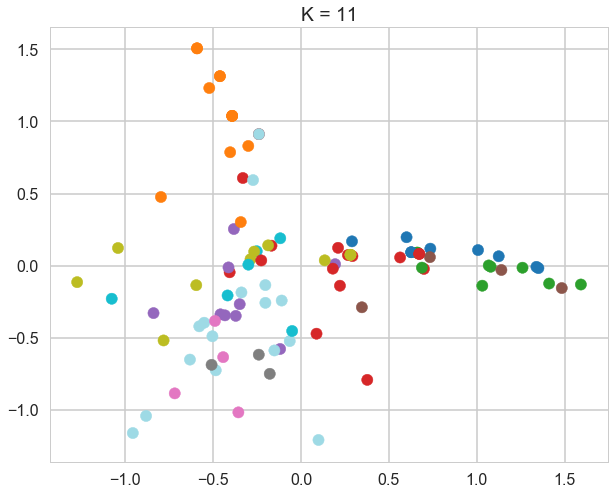

In [15]:
# import needed. module 
from sklearn.cluster import AffinityPropagation

# instantiating model
affprop = AffinityPropagation(damping=.9)

# fitting model and plotting first two principal components
model_tester(affprop)

The affinity propagation model has 11 clusters which doesn't appear to show any trend with wine variety. 

### Spectral Clustering

Preference of cluster 0:
Champagne             81
Cabernet Sauvignon    32
Prosecco              30
Espumante             20
Malbec                16
Merlot                15
Pinot Noir            15
Chardonnay            15
Pinot Grigio           2
Name: varietal, dtype: int64

Preference of cluster 1:
Pinot Noir    29
Name: varietal, dtype: int64

Preference of cluster 2:
Espumante       20
Malbec          16
Pinot Grigio    15
Prosecco        13
Merlot           5
Name: varietal, dtype: int64



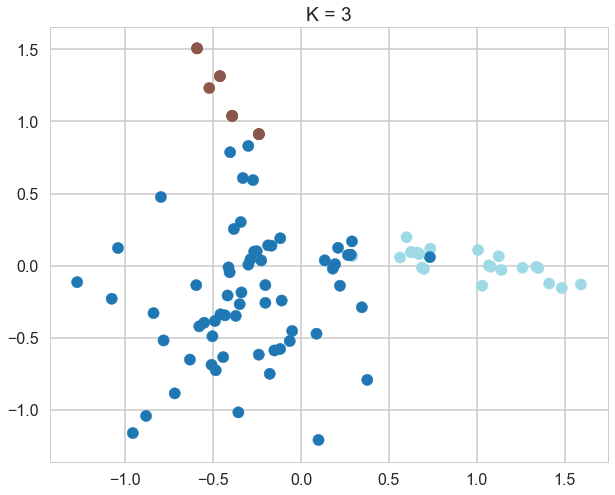

In [16]:
# importing needed module
from sklearn.cluster import SpectralClustering

# instantiating model
spec_clus = SpectralClustering(n_clusters = 3)

# fitting model
model_tester(spec_clus)

The Spectral clustering model with 3 clusters does not perform as well as the KMeans model when grouping the customers with a preference for Pinot Noir   

### Agglomerative clustering 

Preference of cluster 0:
Champagne             77
Cabernet Sauvignon    31
Prosecco              24
Chardonnay            14
Merlot                13
Malbec                13
Espumante             11
Pinot Noir             6
Pinot Grigio           1
Name: varietal, dtype: int64

Preference of cluster 1:
Espumante             29
Malbec                17
Prosecco              17
Pinot Grigio          16
Merlot                 6
Champagne              3
Cabernet Sauvignon     1
Name: varietal, dtype: int64

Preference of cluster 2:
Pinot Noir    38
Malbec         2
Prosecco       2
Chardonnay     1
Champagne      1
Merlot         1
Name: varietal, dtype: int64



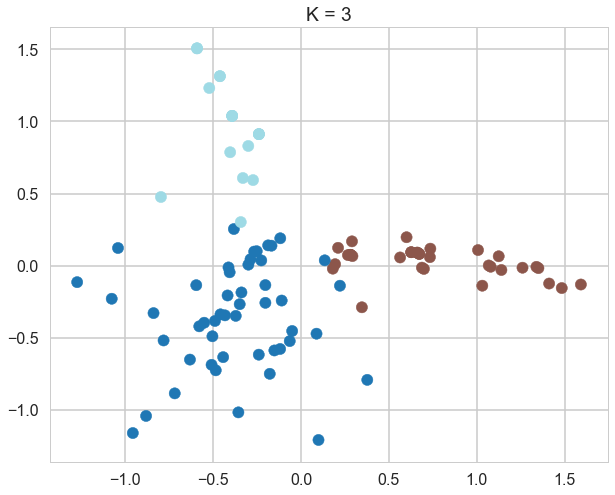

In [17]:
# importing needed module
from sklearn.cluster import AgglomerativeClustering

# instantiating model
agg_clus = AgglomerativeClustering(n_clusters = 3)

# fitting model
model_tester(agg_clus)

The Agglomerative clustering model with 3 clusters appears to do a better job than the KMeans model when grouping customers based on their wine preferences. The group appears to be better split between customers that like a variety of wines (cluster 0), white wines (cluster 1) and red wines (cluster 2).

### DBSCAN

Preference of cluster 0:
Espumante       7
Malbec          6
Pinot Grigio    5
Prosecco        1
Name: varietal, dtype: int64

Preference of cluster 1:
Pinot Noir    34
Name: varietal, dtype: int64

Preference of cluster 2:
Espumante       11
Pinot Grigio     9
Malbec           8
Prosecco         8
Merlot           2
Champagne        1
Name: varietal, dtype: int64

Preference of cluster 3:
Prosecco     4
Espumante    1
Name: varietal, dtype: int64

Preference of cluster 4:
Champagne             80
Cabernet Sauvignon    32
Prosecco              30
Espumante             21
Merlot                18
Malbec                18
Chardonnay            15
Pinot Noir            10
Pinot Grigio           3
Name: varietal, dtype: int64



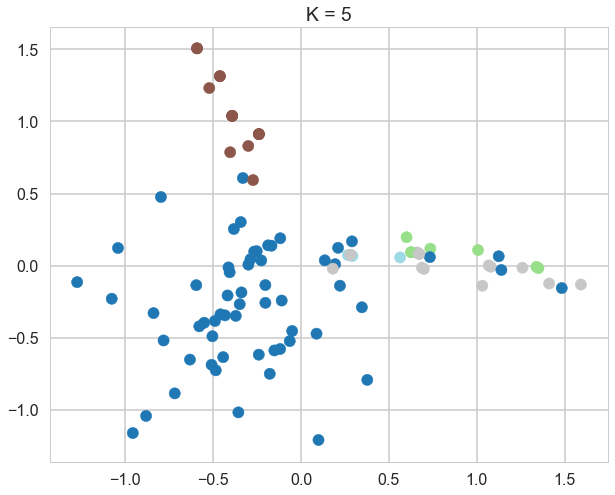

In [18]:
# importing needed module
from sklearn.cluster import DBSCAN

# instantiating model
dbscan = DBSCAN(eps = 1.2)

# fitting model
model_tester(dbscan)

The DBSCAN model with five clusters has two of the usual two categories (customers that like a variety of wines and customers that like the red wine, Pinot Noir. The model does better than KMeans at selecting customers that solely drink Pinot Noir. Furthermore, customers with white wine preferences are further split by the model into three groups:
* Cluster 3: customers that ordered only white wines
* Cluster 2: customers that ordered both white and red wine with a stronger preference for the white wine, Prosecco. 
* Cluster 0: customers that ordered both white and red wine but with little preference for the white wine, Proseco.

The DBSCAN model appears to be the best relative to the other models used for the following reasons:
* The three white wine clusters created by DBSCAN provide additional insight into customers' wine preferences.
* It has the best cluster of customers that order only Pinot Noir. 